In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import QuantileTransformer
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif

In [2]:
traffic_df = pd.read_csv('D:/pythonProject/CICIDS2017-datast-analysis/data/Whole-Traffic.pcap_ISCX.csv')
traffic_df.drop(columns=traffic_df.columns[0], axis=1, inplace=True)
# -----------------------------------------------------------------------------------------------------------------------
# Data cleaning

In [3]:
counts = traffic_df.loc[:, : 'Idle Min'].nunique()
to_del = [i for i, v in enumerate(counts) if (float(v)/traffic_df.loc[:, : 'Idle Min'].shape[0]*100) < 1]
print('Columns with only one percent of unique values: {}'.format(traffic_df.columns[to_del]))
print('Shape before deleting columns: {}'.format(traffic_df.loc[:, : 'Idle Min'].shape))
traffic_df.drop(traffic_df.columns[to_del], axis=1, inplace=True)
print('Shape after deleting columns: {}'.format(traffic_df.loc[:, : 'Idle Min'].shape))

Columns with only one percent of unique values: Index(['Total Fwd Packets', 'Total Backward Packets', 'Fwd Packet Length Min',
       'Bwd Packet Length Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Min Packet Length', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
       'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Bwd Packets',
       'act_data_pkt_fwd', 'min_seg_size_forward'],
      dtype='object')
Shape before deleting columns: (48146, 78)
Shape after deleting columns: (48146, 47)


In [4]:
print('Number of infinite values: {}'.format(np.isinf(traffic_df.loc[:, : 'Idle Min']).values.sum()))
print('Indexes of infinite values: {}'.format(np.where(np.isinf(traffic_df.loc[:, : 'Idle Min']))))
print('Shape before infinite values deleting: {}'.format(traffic_df.loc[:, : 'Idle Min'].shape))
traffic_df.replace([np.inf, -np.inf], np.nan, inplace=True)
traffic_df.dropna(axis=0, inplace=True)
traffic_df.reset_index(drop=True, inplace=True)
print('Shape after infinite values deleting: {}'.format(traffic_df.loc[:, : 'Idle Min'].shape))
# -----------------------------------------------------------------------------------------------------------------------
# ANOVA f-test feature selection approach

Number of infinite values: 62
Indexes of infinite values: (array([   37,    37,   129,   129,   585,   585,   680,   680,   693,
         693,   705,   705,   737,   737,   812,   812,  1003,  1003,
        1221,  1221,  8284,  8284,  9045,  9045, 28158, 28158, 29786,
       29786, 30324, 30324, 30590, 30590, 31887, 31887, 35841, 35841,
       37091, 37091, 39004, 39004, 40529, 40529, 41001, 41001, 42293,
       42293, 43680, 43680, 43765, 43765, 44568, 44568, 45100, 45100,
       45173, 45173, 46888, 46888, 47090, 47090, 47711, 47711],
      dtype=int64), array([10, 11, 10, 11, 10, 11, 10, 11, 10, 11, 10, 11, 10, 11, 10, 11, 10,
       11, 10, 11, 10, 11, 10, 11, 10, 11, 10, 11, 10, 11, 10, 11, 10, 11,
       10, 11, 10, 11, 10, 11, 10, 11, 10, 11, 10, 11, 10, 11, 10, 11, 10,
       11, 10, 11, 10, 11, 10, 11, 10, 11, 10, 11], dtype=int64))
Shape before infinite values deleting: (48146, 47)
Shape after infinite values deleting: (48115, 47)


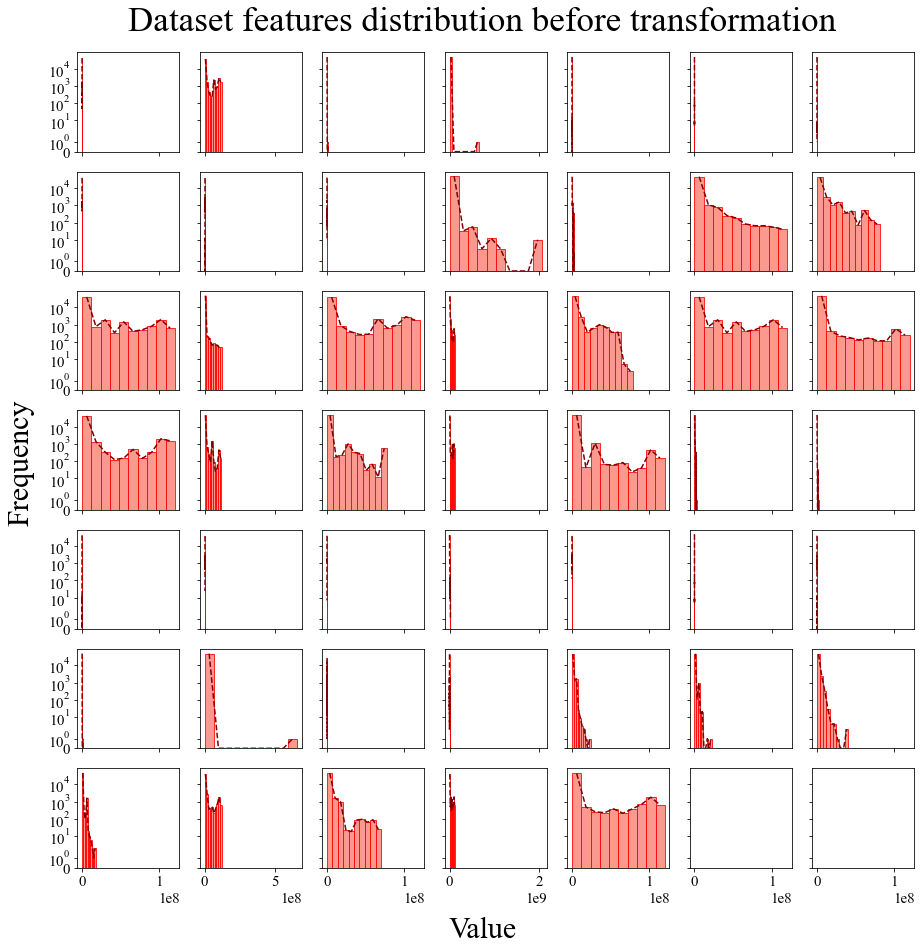

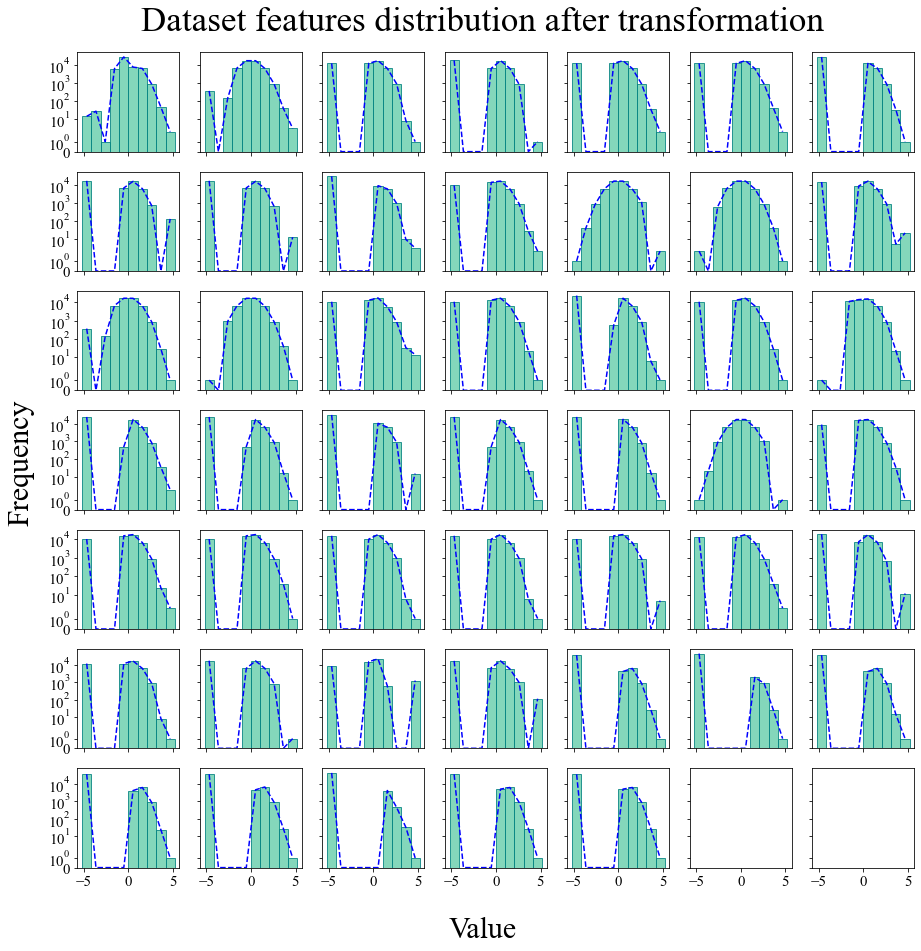

In [5]:
# the data for each factor level (each class in the output feature) should be normally distributed


def plot_data_distribution(dataframe, title, graph_colors):
    font = {'family': 'Times New Roman', 'weight': 'book', 'size': 15}
    plt.rc('font', **font)

    fig, ax = plt.subplots(7, 7, sharey='row', sharex='col', figsize=(15, 15))
    ax = ax.flatten()

    for idx, (columnName, columnData) in enumerate(dataframe.iteritems()):
        n, bins, patches = ax[idx].hist(columnData.values, color=graph_colors[0],
                                        edgecolor=graph_colors[1], alpha=0.8)
        x = bins[:-1] + (bins[1] - bins[0])/2
        ax[idx].plot(x, n, '--', color=graph_colors[2])
        ax[idx].set_yscale('symlog')

    fig.text(0.5, 0.9, title, ha='center', fontsize=35)
    fig.text(0.5, 0.06, 'Value', ha='center', fontsize=30)
    fig.text(0.06, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=30)

    plt.show()


# plot feature distribution after transformation
plot_data_distribution(traffic_df.loc[:, : 'Idle Min'], 'Dataset features distribution before transformation',
                       graph_colors=['salmon', 'red', 'maroon'])

# map data distribution to normal or approximately normal
scaler = QuantileTransformer(output_distribution='normal', n_quantiles=1000, random_state=42)
scaled_df = scaler.fit_transform(traffic_df.loc[:, : 'Idle Min'])
x_anova_df = pd.DataFrame(scaled_df)
# plot feature distribution after transformation
plot_data_distribution(x_anova_df, 'Dataset features distribution after transformation',
                       graph_colors=['mediumaquamarine', 'teal', 'blue'])

Feature f-score Destination Port: 4848.586688267312
Feature f-score Flow Duration: 1519.5399262684878
Feature f-score Total Length of Fwd Packets: 1315.9737158046223
Feature f-score Total Length of Bwd Packets: 1483.616233657472
Feature f-score Fwd Packet Length Max: 1341.7675873319404
Feature f-score Fwd Packet Length Mean: 1279.3511297216107
Feature f-score Fwd Packet Length Std: 1126.01830676828
Feature f-score Bwd Packet Length Max: 1543.8811765695716
Feature f-score Bwd Packet Length Mean: 1593.47216404164
Feature f-score Bwd Packet Length Std: 1311.651885029354
Feature f-score Flow Bytes/s: 2462.9512158123903
Feature f-score Flow Packets/s: 2764.51279959072
Feature f-score Flow IAT Mean: 2755.93438606292
Feature f-score Flow IAT Std: 1648.1660256345872
Feature f-score Flow IAT Max: 1974.8406096006177
Feature f-score Flow IAT Min: 1346.0899057817169
Feature f-score Fwd IAT Total: 2491.8061432906948
Feature f-score Fwd IAT Mean: 2791.0779143787545
Feature f-score Fwd IAT Std: 1739.

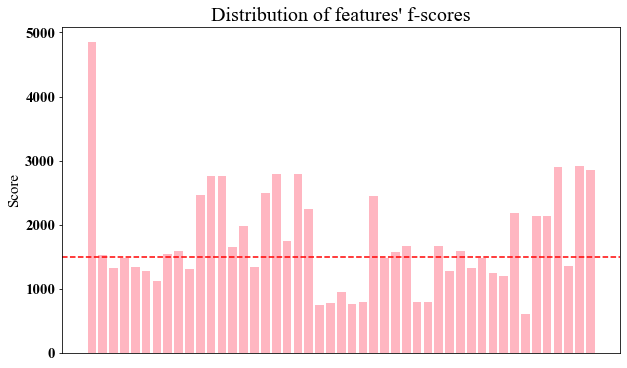

In [6]:
y_df = traffic_df.iloc[:, -1]
# assign column (features) name to the x_df
x_anova_df.columns = traffic_df.loc[:, : 'Idle Min'].columns

fv, pv = f_classif(x_anova_df, y_df)
# print features f-scores
for i in range(len(fv)):
    print('Feature f-score {}: {}'.format(x_anova_df.columns[i], fv[i]))


def plot_scores(x, y, title, line):
    font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 15}
    plt.rc('font', **font)

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.bar(x, y, color='lightpink')
    ax.axhline(line, ls='--', color='r')
    ax.get_xaxis().set_visible(False)
    ax.set(ylabel='Score')
    ax.set_title(title, fontsize=20)

    plt.show()


plot_scores(x_anova_df.columns, fv, "Distribution of features' f-scores", 1500)

In [7]:

# function drops features with the scorers less than threshold and returns dict with selected features and scores
def select_features_by_threshold(df, features_values, threshold):
    features_dict = dict()
    for i in range(len(features_values)):
        features_dict[df.columns[i]] = features_values[i]

    to_del = [key for key, v in features_dict.items() if v <= threshold]
    print('Features to delete count: {}'.format(len(to_del)))
    print('Features to delete: {}'.format(to_del))
    print('Shape before selecting features: {}'.format(df.shape))
    df.drop(to_del, axis=1, inplace=True)
    print('Shape after selecting features: {}'.format(df.shape))

    selected_features_dict = features_dict
    for i in to_del:
        del selected_features_dict[i]
    print('Selected features: {}'.format(selected_features_dict))
    print('Selected features number: {}'.format(len(selected_features_dict)))

    return selected_features_dict


selected_features_dict = select_features_by_threshold(x_anova_df, fv, 1500)


Features to delete count: 22
Features to delete: ['Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Std', 'Flow IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Bwd Packets/s', 'Packet Length Std', 'Packet Length Variance', 'Avg Fwd Segment Size', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'Active Std', 'Idle Std']
Shape before selecting features: (48115, 47)
Shape after selecting features: (48115, 25)
Selected features: {'Destination Port': 4848.586688267312, 'Flow Duration': 1519.5399262684878, 'Bwd Packet Length Max': 1543.8811765695716, 'Bwd Packet Length Mean': 1593.47216404164, 'Flow Bytes/s': 2462.9512158123903, 'Flow Packets/s': 2764.51279959072, 'Flow IAT Mean': 2755.93438606292, 'Flow IAT Std': 1648.1660256345872, 'Flow IAT Max': 1974.8406096006177, 'Fwd IAT Total': 2491.806143290

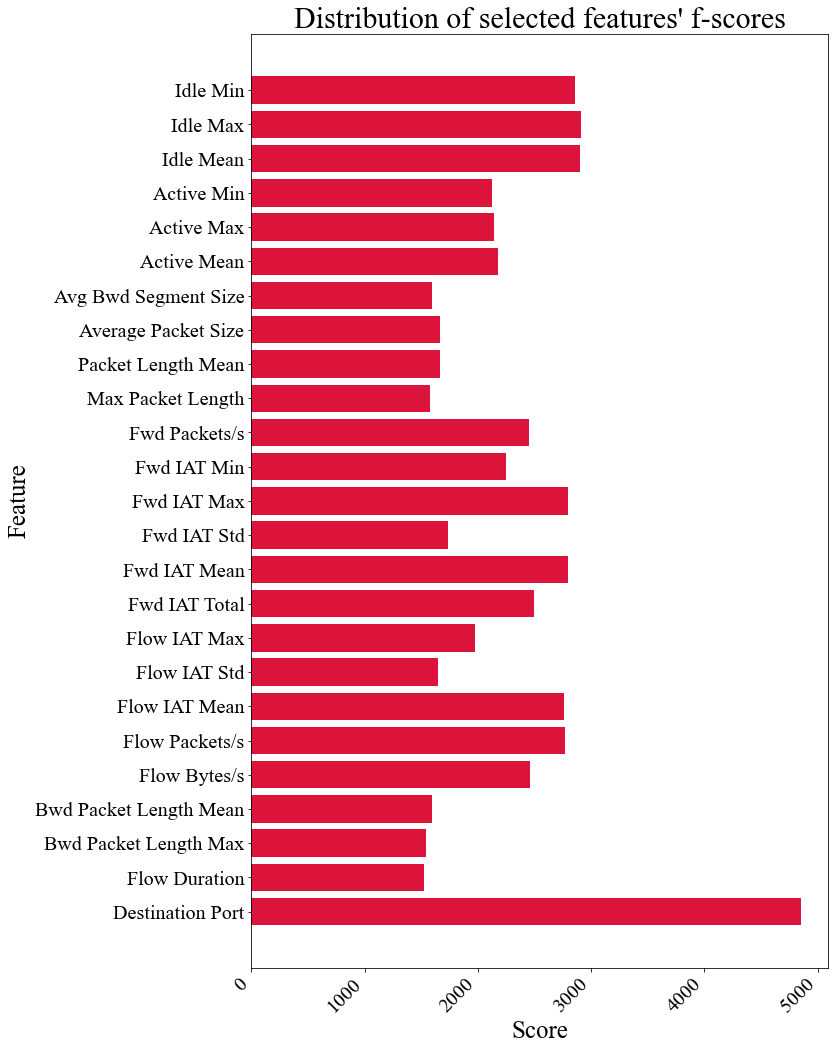

In [8]:

def plot_selected_features(x, y, title, color):
    font = {'family': 'Times New Roman', 'weight': 'book', 'size': 20}
    plt.rc('font', **font)
    plt.rcParams.update({'figure.autolayout': True})

    fig, ax = plt.subplots(figsize=(12, 15))

    ax.barh(x, y, color=color)
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment='right')
    ax.set_xlabel('Score', fontsize=25)
    ax.set_ylabel('Feature', fontsize=25)
    ax.set_title(title, fontsize=30)

    plt.show()


plot_selected_features(list(selected_features_dict.keys()), list(selected_features_dict.values()),
                       "Distribution of selected features' f-scores", 'crimson')

# -----------------------------------------------------------------------------------------------------------------------
# Information gain feature selection approach

Feature info gain score Destination Port: 1.1958676029153967
Feature info gain score Flow Duration: 1.2641188945322483
Feature info gain score Total Length of Fwd Packets: 1.2417347010419455
Feature info gain score Total Length of Bwd Packets: 1.0651414340296406
Feature info gain score Fwd Packet Length Max: 1.2253044440076755
Feature info gain score Fwd Packet Length Mean: 1.1254757548719567
Feature info gain score Fwd Packet Length Std: 0.8200941772796626
Feature info gain score Bwd Packet Length Max: 1.0033841738517453
Feature info gain score Bwd Packet Length Mean: 1.1054348774285254
Feature info gain score Bwd Packet Length Std: 0.7558940629911524
Feature info gain score Flow Bytes/s: 1.1382890462395259
Feature info gain score Flow Packets/s: 1.281624013601594
Feature info gain score Flow IAT Mean: 1.250486702164824
Feature info gain score Flow IAT Std: 1.0966196251259213
Feature info gain score Flow IAT Max: 1.292534593710003
Feature info gain score Flow IAT Min: 0.58835715716767

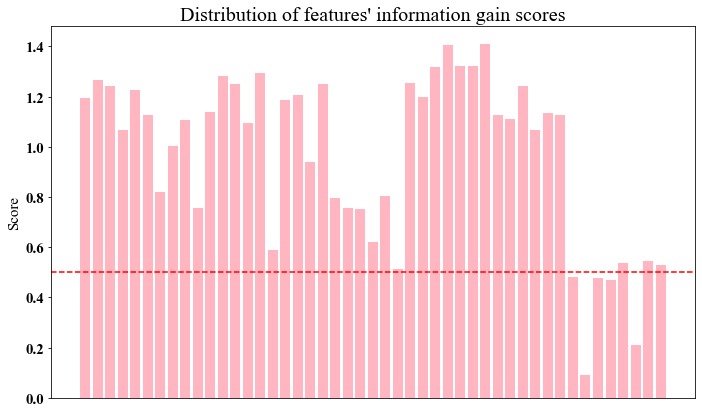

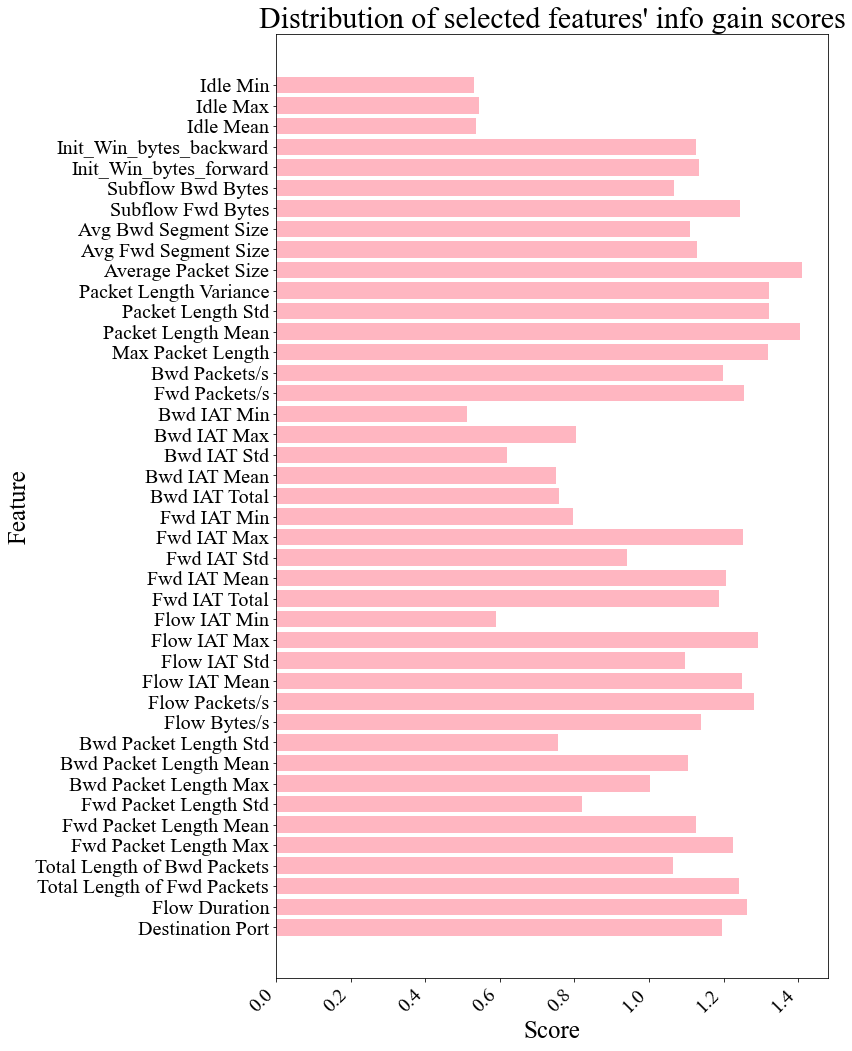

In [9]:
x_info_gain_df = traffic_df.loc[:, : 'Idle Min']
mi = mutual_info_classif(x_info_gain_df, y_df)

# print features info gain scores
for i in range(len(mi)):
    print('Feature info gain score {}: {}'.format(x_info_gain_df.columns[i], mi[i]))

plot_scores(x_info_gain_df.columns, mi, "Distribution of features' information gain scores", 0.5)
selected_features_dict = select_features_by_threshold(x_info_gain_df, mi, 0.5)
plot_selected_features(list(selected_features_dict.keys()), list(selected_features_dict.values()),
                       "Distribution of selected features' info gain scores", 'lightpink')
# -----------------------------------------------------------------------------------------------------------------------
# removing highly correlated with each other input features

<ipython-input-10-82de9f60c2d9>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(cor_matrix, dtype=np.bool))


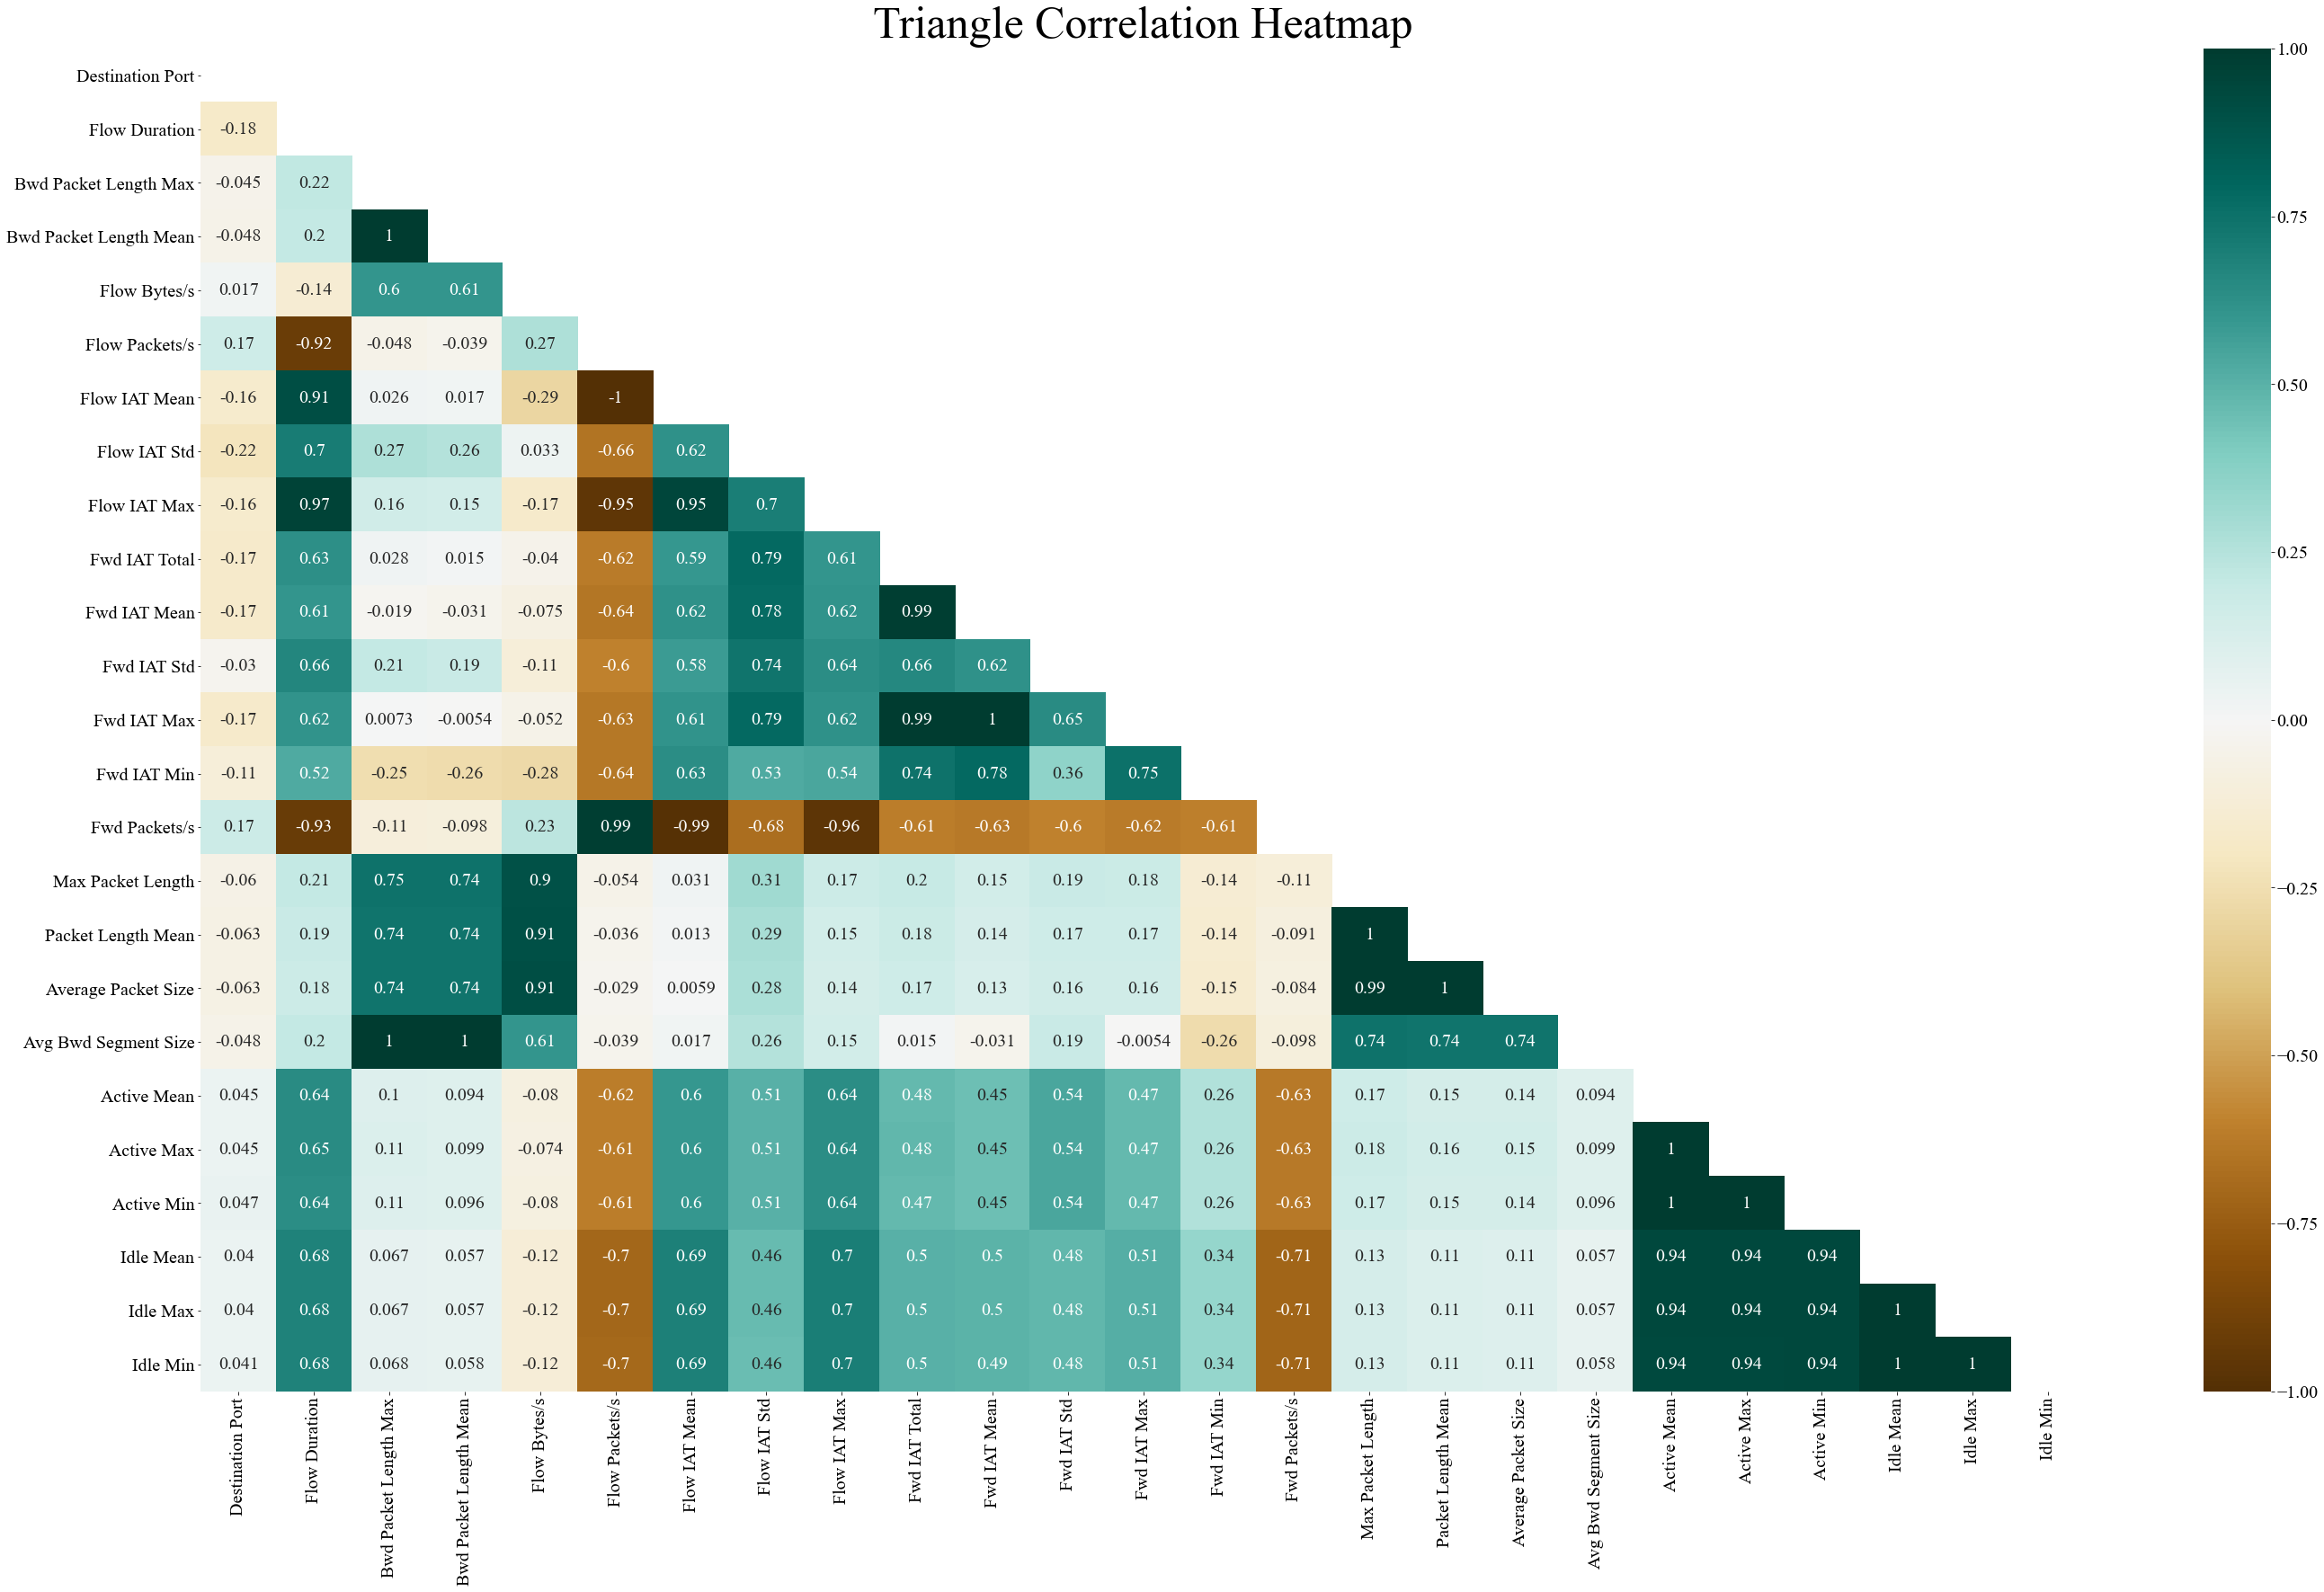

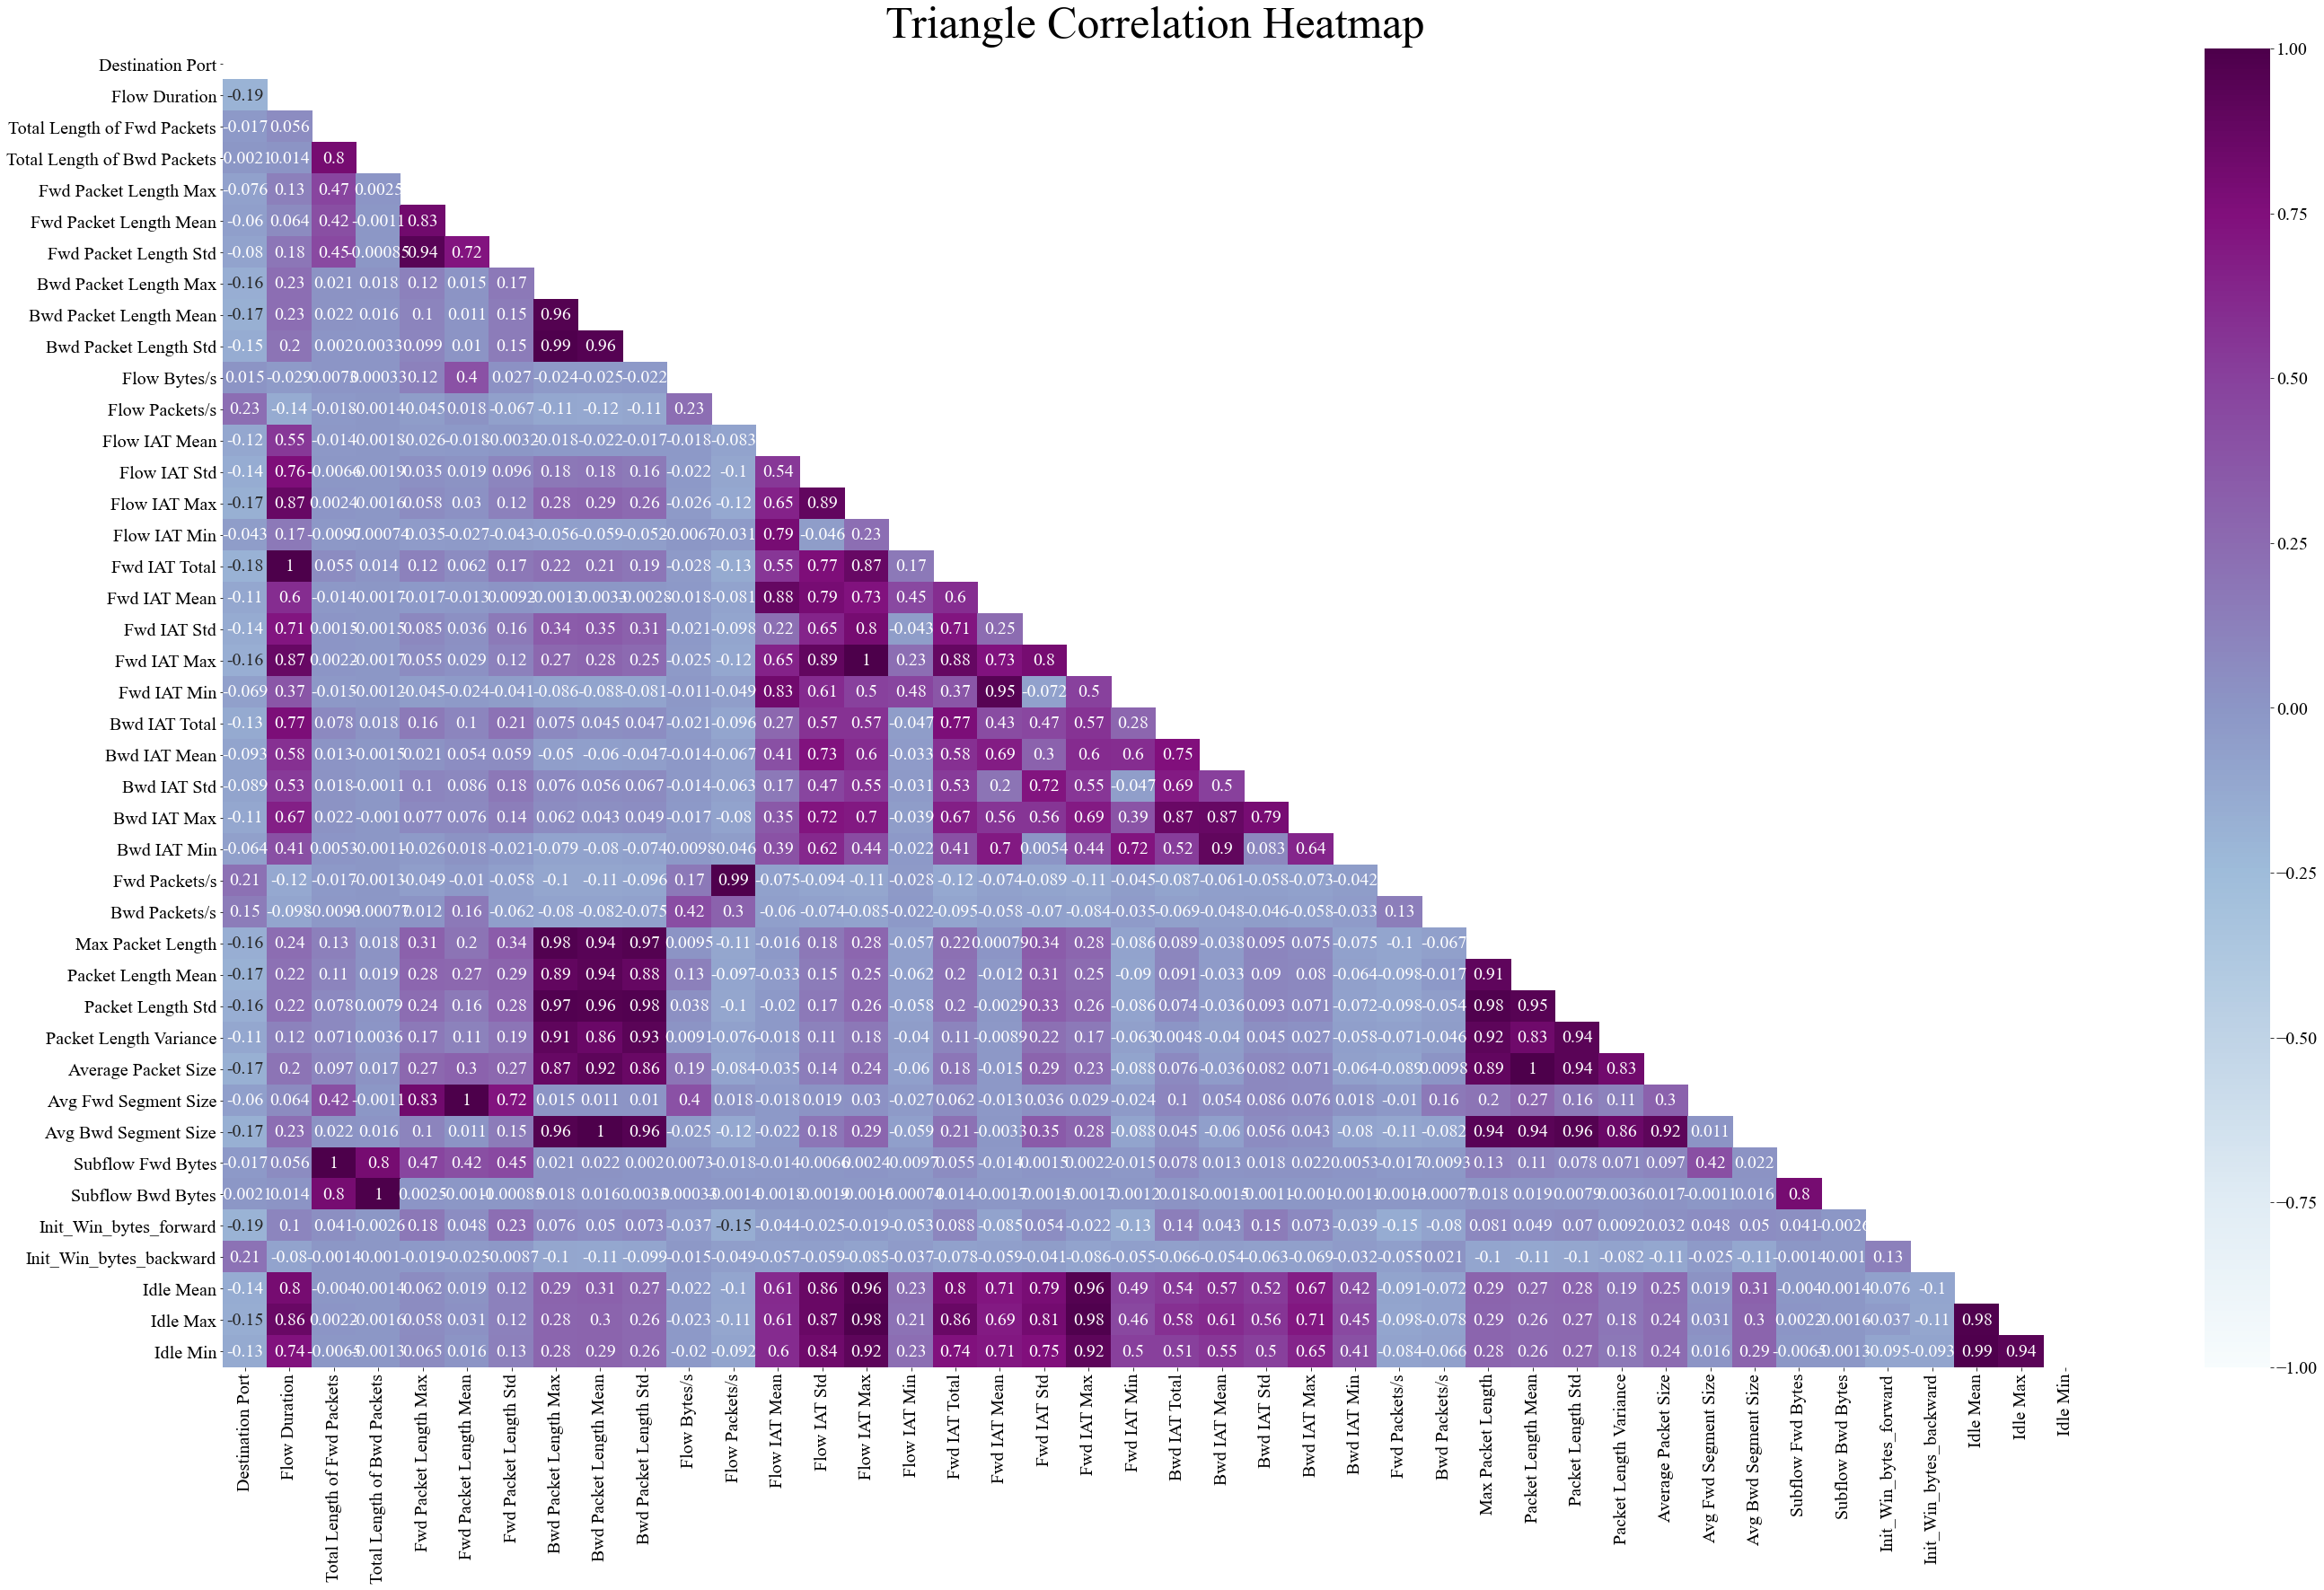

In [10]:

# function plots heatmap and returns Pearson's correlation matrix
def plot_heatmap(df, cmap):
    cor_matrix = df.corr()
    mask = np.triu(np.ones_like(cor_matrix, dtype=np.bool))
    plt.figure(figsize=(40, 25))
    heatmap = sns.heatmap(cor_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap=cmap)
    heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 50}, pad=12)
    plt.show()

    return cor_matrix


# correlation matrix and heatmap for ANOVA f-test approach
cor_matrix_anova = plot_heatmap(x_anova_df, 'BrBG')

# correlation matrix and heatmap for info gain approach
cor_matrix_info_gain = plot_heatmap(x_info_gain_df, 'BuPu')

In [11]:

def drop_cor_columns(df, cor_matrix):
    upper_tri = cor_matrix.abs().where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    to_del = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
    print('Number of highly correlated features: {}'.format(len(to_del)))
    print('Highly correlated features: {}'.format(to_del))
    print('Shape before highly correlated features deleting: {}'.format(df.shape))
    df.drop(to_del, axis=1, inplace=True)
    print('Shape after highly correlated features deleting: {}'.format(df.shape))


# drop columns in x_anova_df (ANOVA f-test approach)
drop_cor_columns(x_anova_df, cor_matrix_anova)

# drop columns in x_info_gain_df (Information gain approach)
drop_cor_columns(x_info_gain_df, cor_matrix_info_gain)

Number of highly correlated features: 13
Highly correlated features: ['Bwd Packet Length Mean', 'Flow IAT Mean', 'Flow IAT Max', 'Fwd IAT Mean', 'Fwd IAT Max', 'Fwd Packets/s', 'Packet Length Mean', 'Average Packet Size', 'Avg Bwd Segment Size', 'Active Max', 'Active Min', 'Idle Max', 'Idle Min']
Shape before highly correlated features deleting: (48115, 25)
Shape after highly correlated features deleting: (48115, 12)
Number of highly correlated features: 15
Highly correlated features: ['Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Fwd IAT Total', 'Fwd IAT Max', 'Fwd Packets/s', 'Max Packet Length', 'Packet Length Std', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes', 'Idle Mean', 'Idle Max', 'Idle Min']
Shape before highly correlated features deleting: (48115, 42)
Shape after highly correlated features deleting: (48115, 27)


<ipython-input-11-ad851cf87f00>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.abs().where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))


In [12]:
info_gain_df = pd.concat([x_info_gain_df, y_df], axis=1)
info_gain_df.to_csv(r'D:/pythonProject/CICIDS2017-datast-analysis/data/Processed-Traffic(info gain).pcap_ISCX.csv',
                    index=False)

anova_df = pd.concat([x_anova_df, y_df], axis=1)
anova_df.to_csv(r'D:/pythonProject/CICIDS2017-datast-analysis/data/Processed-Traffic(anova).pcap_ISCX.csv',
                index=False)

traffic_df.to_csv(r'D:/pythonProject/CICIDS2017-datast-analysis/data/Processed-Traffic(only cleaned).pcap_ISCX.csv',
                  index=False)







